In [1]:
from hanlp_restful import HanLPClient
import json
import os
import time

HanLP = HanLPClient('https://www.hanlp.com/api', auth="MzM5MEBiYnMuaGFubHAuY29tOmxzWHpqTmdJYURaMlplVEU=", language='zh')
HanLP.parse(["我是李刚", "我爸是李刚"], tasks='pos/ctb')

{'tok/fine': [['我', '是', '李刚'], ['我', '爸', '是', '李刚']],
 'pos/ctb': [['PN', 'VC', 'NR'], ['PN', 'NN', 'VC', 'NR']]}

In [2]:

def split_into_blocks(text, segment_size=150):
    # split text into a list of segments
    segment_list = []
    i = -1
    while True:
        i += 1
        left, right = i*segment_size, (i+1)*segment_size
        segment = text[left: right]
        segment_list.append(segment)
        if right >= len(text):
            break
    return segment_list

In [3]:
block_size = 150
big_block_size = 14000

results_dict = dict()

In [4]:
def join(ll):
    return_l = []
    for l in ll:
        return_l = return_l + l
    return return_l

In [ ]:
texts = []
query_timestamps = []
root = "cleaned_texts"
for file_name in os.listdir(root):
    print("currently processing", file_name)
    if file_name in results_dict:
        continue
    with open(os.path.join(root, file_name), 'r', encoding='utf-8') as rf:
        text = rf.read()
#         def read_in_blocks(text, block_size=15000):
#             while True:
#                 block = text.read(block_size)
#             if not block:
#                 return  # 文件读取完毕
#         read_in_blocks(text)
    
    all_tokens = []
    all_pos_tags = []
    
    big_block_list = split_into_blocks(text, 14000)
    
    for big_block in big_block_list:
        block_list = split_into_blocks(big_block, 150)

        if (len(query_timestamps) < 60):
            gap = 10000
        else:
            current_time = time.time()
            gap = current_time - query_timestamps[-60]
        if gap < 70:
            print("\tsleeping for", 70-gap)
            time.sleep(70-gap)
        query_timestamps.append(time.time())
        
        # 分词
        data = HanLP.parse(block_list, tasks='pos/ctb')
        tokens = data['tok/fine']
        pos_tags = data['pos/ctb']

        all_tokens = all_tokens + join(tokens)
        all_pos_tags = all_pos_tags + join(pos_tags)

    results_dict[file_name] = {"all_tokens": all_tokens, "all_pos_tags": all_pos_tags}
#     print (all_tokens)

In [5]:
import json

#with open("results_dict3.json", "w", encoding='utf-8') as f:
    #json.dump(results_dict, f)

with open("results_dict3.json", "r", encoding='utf-8') as f:
     results_dict = json.load(f)

In [6]:
for file_name in results_dict:
    all_tokens, all_pos_tags = results_dict[file_name]['all_tokens'], results_dict[file_name]['all_pos_tags']
    noun_tokens = []
    for i in range(len(all_pos_tags)):
        if all_pos_tags[i].startswith("N"):
            noun_tokens.append(all_tokens[i])
    results_dict[file_name]["noun_tokens"] = noun_tokens

In [7]:
def merge_stopwords(*stopwords_lists):
    merged_stopwords = set()

    for stopwords_file in stopwords_lists:
        with open(stopwords_file, 'r', encoding='utf-8') as file:
            stopwords = set(file.read().split())
            merged_stopwords.update(stopwords)

    return list(merged_stopwords)

stopwords_list1 = 'scu_stopwords.txt'
stopwords_list2 = 'cn_stopwords.txt'
stopwords_list3 = 'baidu_stopwords.txt'
stopwords_list4 = 'hit_stopwords.txt'
stopwords_list5 = 'cust_stopwords.txt'

merged_stopwords = merge_stopwords(stopwords_list1, stopwords_list2, stopwords_list3, stopwords_list4, stopwords_list5)

In [8]:
for filename in results_dict:
    token_list = results_dict[filename]['noun_tokens']
    all_words = [word for word in token_list if word not in merged_stopwords]
    results_dict[filename]['cleaned_noun_tokens'] = all_words
#     print(all_words)

In [9]:
texts = []
numbers = []
textid2name = dict()
for key, item in results_dict.items():
    texts.append(item['cleaned_noun_tokens'])
    textid2name[len(texts)-1] = key
    numbers.append(len(item['cleaned_noun_tokens']))
numbers.sort()
print(numbers)

def split_list(l, length=800):
    target = len(l)//length + 1
    segment_length = round(len(l)/target)
    return split_into_blocks(l, segment_length)
new_texts = []

chunk2text = dict()
for i in range(len(texts)):
    text = texts[i]
    splitted_text = split_list(text)
    for j in range(len(splitted_text)):
        new_texts.append(splitted_text[j])
        chunk2text[len(new_texts)-1] = {"id of original doc": i, "name of original doc": textid2name[i], "chunk index": j, "total # chunks": len(splitted_text)}
print(len(new_texts))
texts = new_texts

[80, 218, 225, 233, 290, 301, 311, 342, 344, 371, 432, 447, 501, 504, 505, 520, 531, 553, 567, 575, 587, 612, 683, 706, 728, 729, 757, 768, 780, 818, 833, 912, 958, 1012, 1019, 1065, 1141, 1157, 1181, 1211, 1212, 1214, 1249, 1249, 1300, 1472, 1508, 1539, 1853, 1989, 2028, 2029, 2090, 2125, 2256, 2617, 2627, 2845, 2948, 3116, 3139, 3161, 3206, 3330, 3431, 3512, 3699, 3783, 3856, 4052, 4211, 4228, 4309, 4443, 4448, 4500, 4524, 4549, 4718, 4735, 4926, 5282, 5312, 5431, 5521, 5522, 5634, 5681, 5696, 5769, 5932, 6146, 6176, 6265, 6325, 6350, 6392, 6699, 6701, 6851, 6860, 7408, 7438, 8133, 8206, 8527, 8595, 8778, 9255, 9276, 9485, 9827, 10687, 10942, 10988, 11003, 11048, 12154, 12470, 14430, 14462, 14602, 14849, 14980, 15762, 16355, 16526, 16825, 17446, 17967, 20886, 22433, 24047, 34379]
1007


In [ ]:
chunk2text[2108]

In [10]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [11]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(abc) for abc in texts]

In [ ]:
word_frequency = dict()
for text in texts:
    for word in text:
        if word not in word_frequency:
            word_frequency[word] = 0
        word_frequency[word] += 1
word_freq_pairs = [(key, val) for key, val in word_frequency.items()]
word_freq_pairs.sort(key=lambda var: var[1], reverse=True)
word_freq_pairs

In [18]:
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=100,random_state = 100, iterations=300, chunksize = 2200,eval_every = None)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

[(0, '0.014*"王" + 0.012*"女" + 0.009*"狀" + 0.009*"衆" + 0.007*"神" + 0.006*"力" + 0.005*"石" + 0.005*"輩" + 0.005*"尸" + 0.005*"馬"'), (1, '0.023*"主教" + 0.017*"王后" + 0.010*"公爵" + 0.010*"王" + 0.010*"女人" + 0.008*"话" + 0.008*"地方" + 0.008*"马" + 0.008*"朋友" + 0.008*"信"'), (2, '0.013*"船" + 0.008*"女" + 0.007*"夫人" + 0.005*"書" + 0.005*"舟" + 0.004*"家" + 0.004*"海" + 0.004*"室" + 0.004*"車" + 0.003*"父"'), (3, '0.008*"舟" + 0.005*"麥折崙" + 0.005*"神" + 0.005*"象" + 0.004*"親王" + 0.004*"佛罗" + 0.004*"軍" + 0.004*"社长" + 0.003*"班" + 0.003*"月"'), (4, '0.018*"舟" + 0.015*"船" + 0.007*"物" + 0.007*"島" + 0.007*"水" + 0.006*"鳥" + 0.006*"樹" + 0.005*"船主" + 0.005*"牛" + 0.005*"天"')]
0.4385035067200282
[(0, '0.019*"王" + 0.015*"女" + 0.009*"神" + 0.008*"衆" + 0.008*"狀" + 0.006*"女王" + 0.006*"力" + 0.005*"石" + 0.005*"國" + 0.005*"輩"'), (1, '0.024*"主教" + 0.018*"王后" + 0.011*"公爵" + 0.011*"王" + 0.011*"女人" + 0.008*"地方" + 0.008*"话" + 0.008*"马" + 0.008*"朋友" + 0.008*"信"'), (2, '0.020*"船" + 0.008*"夫人" + 0.007*"女" + 0.005*"海" + 0.005*"船主" + 0.004*"國" 

0.45196572389187345
[(0, '0.016*"佛羅" + 0.010*"主" + 0.009*"古國" + 0.008*"幽情" + 0.006*"月" + 0.005*"臣" + 0.005*"國" + 0.004*"力" + 0.004*"弹丸" + 0.003*"界"'), (1, '0.031*"主教" + 0.022*"王后" + 0.014*"公爵" + 0.013*"女人" + 0.012*"王" + 0.011*"马" + 0.011*"话" + 0.009*"信" + 0.009*"朋友" + 0.009*"地方"'), (2, '0.031*"女" + 0.011*"書" + 0.009*"父" + 0.008*"狀" + 0.007*"夫人" + 0.006*"馬" + 0.006*"家" + 0.006*"母" + 0.006*"金" + 0.005*"客"'), (3, '0.010*"社长" + 0.009*"美人" + 0.005*"夫人" + 0.005*"月" + 0.005*"侯爵" + 0.005*"島" + 0.005*"州" + 0.004*"國" + 0.004*"妾" + 0.004*"賊"'), (4, '0.020*"舟" + 0.016*"物" + 0.015*"樹" + 0.015*"鳥" + 0.013*"妻" + 0.011*"牛" + 0.010*"狗" + 0.009*"島" + 0.007*"魚" + 0.006*"巢"'), (5, '0.008*"國王" + 0.007*"麥折崙" + 0.006*"國" + 0.006*"女主" + 0.005*"今日" + 0.004*"家" + 0.004*"象" + 0.004*"羊尾" + 0.004*"書" + 0.004*"小人"'), (6, '0.018*"衆" + 0.010*"王" + 0.010*"狀" + 0.009*"馬" + 0.009*"水" + 0.009*"輩" + 0.008*"兵" + 0.007*"象" + 0.007*"槍" + 0.007*"敵"'), (7, '0.025*"舟" + 0.018*"船" + 0.010*"海" + 0.006*"島" + 0.006*"船長" + 0.006*"水"

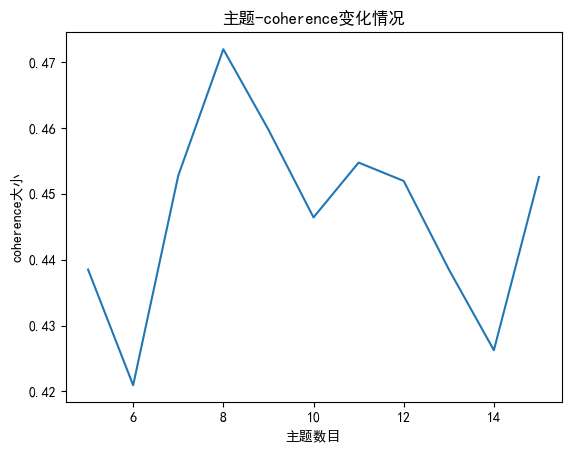

In [19]:
x = range(5,16)
# z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

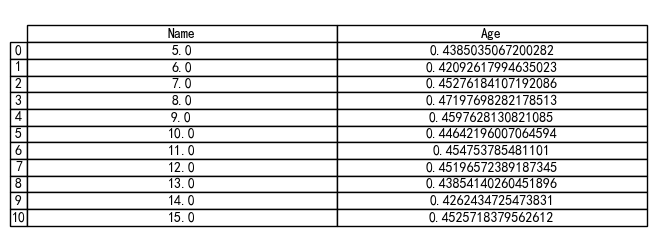

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Sample DataFrame
df = pd.DataFrame({
    'Name': x,
    'Age': y,
    
})

# Create a subplot without frame
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the figsize to fit your needs
ax.axis('tight')
ax.axis('off')

# Create the table and adjust styling
table(ax, df, loc='center', cellLoc='center', rowLoc='center')

plt.show()


In [ ]:
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)


In [ ]:
x = range(1,31)
z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
#y = [coherence(i) for i in x]
plt.plot(x, z)
plt.xlabel('主题数目')
plt.zlabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Sample DataFrame
df = pd.DataFrame({
    'Name': x,
    'Age': z,
    
})

# Create a subplot without frame
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust the figsize to fit your needs
ax.axis('tight')
ax.axis('off')

# Create the table and adjust styling
table(ax, df, loc='center', cellLoc='center', rowLoc='center')

plt.show()

In [21]:
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, passes=100,random_state = 100, iterations=300, chunksize = 2200,eval_every = None)
topic_list=lda.print_topics()
print(topic_list)
 
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    print(i[bz][0])

[(0, '0.008*"佛羅" + 0.008*"神" + 0.008*"埃及" + 0.007*"國" + 0.007*"女王" + 0.006*"尸" + 0.006*"主" + 0.005*"皇帝" + 0.005*"臣" + 0.004*"古國"'), (1, '0.027*"主教" + 0.019*"王后" + 0.012*"公爵" + 0.012*"女人" + 0.011*"王" + 0.009*"话" + 0.009*"马" + 0.008*"朋友" + 0.008*"地方" + 0.008*"信"'), (2, '0.021*"船" + 0.008*"女" + 0.008*"夫人" + 0.005*"國" + 0.005*"家" + 0.005*"船主" + 0.005*"天" + 0.004*"車" + 0.004*"船上" + 0.004*"馬"'), (3, '0.008*"神" + 0.007*"佛罗" + 0.007*"社长" + 0.005*"状" + 0.004*"弹丸" + 0.004*"月" + 0.004*"目" + 0.004*"语" + 0.004*"声" + 0.004*"众"'), (4, '0.012*"牛" + 0.012*"鳥" + 0.012*"樹" + 0.011*"物" + 0.010*"妻" + 0.008*"舟" + 0.008*"狗" + 0.006*"魚" + 0.006*"繩" + 0.006*"水"'), (5, '0.008*"書" + 0.007*"女王" + 0.006*"狀" + 0.005*"物" + 0.004*"家" + 0.004*"匣" + 0.004*"目" + 0.004*"國王" + 0.004*"今日" + 0.004*"尸"'), (6, '0.018*"女" + 0.016*"王" + 0.011*"衆" + 0.011*"狀" + 0.007*"力" + 0.006*"馬" + 0.006*"兵" + 0.006*"神" + 0.006*"石" + 0.005*"輩"'), (7, '0.027*"舟" + 0.016*"船" + 0.009*"海" + 0.008*"島" + 0.006*"水" + 0.006*"物" + 0.006*"船主" + 0.005*"

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.102229 -0.049028       1        1  25.312933
2      0.059398  0.076741       2        1  18.770733
7      0.115725  0.080608       3        1  18.425062
5      0.071724 -0.057325       4        1  11.556039
1     -0.339108  0.087326       5        1   8.426190
4      0.077219  0.151535       6        1   7.502865
0      0.030941 -0.141491       7        1   6.290228
3     -0.118129 -0.148366       8        1   3.715950, topic_info=     Term         Freq        Total Category  logprob  loglift
8933   主教  1650.000000  1650.000000  Default  30.0000  30.0000
519     舟  4733.000000  4733.000000  Default  29.0000  29.0000
2071    船  5316.000000  5316.000000  Default  28.0000  28.0000
9374   王后  1233.000000  1233.000000  Default  27.0000  27.0000
1330    王  4047.000000  4047.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
661     力    82.699578  2787.383293   Topic8  -5.7796  -0.2251
521     色    65.821599  1118.204701   Topic8  -6.0079   0.4600
1514    子    63.633246  1690.601402   Topic8  -6.0417   0.0128
277     命    62.912313  1629.772719   Topic8  -6.0531   0.0381
28      名    59.352877  1431.184340   Topic8  -6.1113   0.1098

[625 rows x 6 columns], token_table=       Topic      Freq Term
term                       
28248      1  0.951783  丁家安
217        4  0.922372   七星
40432      2  0.056641   世子
40432      3  0.028321   世子
40432      4  0.906258   世子
...      ...       ...  ...
62550      6  0.962788   黄油
4174       1  0.047798   黑面
4174       3  0.059748   黑面
4174       4  0.884264   黑面
62499      6  0.973547   龍蝦

[1720 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 8, 6, 2, 5, 1, 4])

In [ ]:
all_topics = {}
lambd = 0.6  # Adjust this accordingly
for i in range(1,8): #Adjust number of topics in final model
    topic = vis.topic_info[vis.topic_info.Category == 'Topic'+str(i)]
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:20].values
all_topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Assuming vis_data is already prepared
# vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Save to a file
pyLDAvis.save_html(vis, 'lda_result_trans.html')

In [ ]:
for i in range(len(corpus)):
    print("chunk", i)
    topic_distribution = lda[corpus[i]]
    break

In [ ]:
def plot_token_freq(tokens, topk=100):
    from collections import Counter
    matplotlib.rc("font",family='YouYuan')
    counter = Counter(tokens)
    temp = list(counter.items())
    temp.sort(key=lambda var: var[1], reverse=True)
    temp = temp[:topk]
#     plt.bar([var[0] for var in temp], [var[1] for var in temp])
#     plt.show()
    print(temp)

In [ ]:
for key in results_dict:
    print("小说：", key)
    print("--------")
    plot_token_freq(results_dict[key]['cleaned_noun_tokens'], 100)
    print("================================================================================================================================")